# Exercise 3<br> Multi-class Classification and Neural Networks

In [20]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import pickle

# Load mat data

In [2]:
data = scipy.io.loadmat("ex3data1.mat")

In [125]:
X = np.append(np.ones((data['X'].shape[0], 1)), data['X'], 1)
y = data['y']
numLabels = 10

m = X.shape[0]  # get sample num

In [133]:
X.shape

(5000, 401)

# Visualize Data

In [128]:
rand_indices = np.random.permutation(list(range(m)))
sel = X[rand_indices[0:100], :]

In [135]:
X[:,1:].shape

(5000, 400)

In [138]:
# Faster
def displayData(X):
    
    
    m, n = X[:,1:].shape
    
    example_width = int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)
    
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    displayX = np.zeros((display_cols*example_height, display_rows*example_width))
    for i in range(display_cols):
        for j in range(display_rows):
            displayX[example_height*i : example_height*i+example_height, example_width*j:example_width*j+example_width] = X[i*10+j, 1:].reshape(example_height, example_width).T 

    
    plt.tick_params(labelleft='off')
    plt.tick_params(labelbottom='off')
    plt.imshow(displayX, cmap='gray')
    
    plt.show()

### Faster way to display data

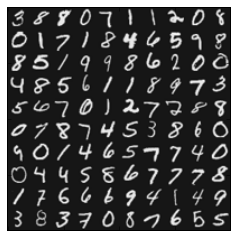

CPU times: user 228 ms, sys: 24.8 ms, total: 252 ms
Wall time: 296 ms


In [139]:
%%time
displayData(sel)

# Logistic Regression Cost Function

In [140]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [141]:
def lrCostFunction(theta, X, y, lamd):
    
    m = len(y)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    # cost
    J = (-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))) ) / m

    # regularization
    J = J + lamd  * sum(theta[1:]**2) / (2*m)
    
    
    grad = X.transpose().dot(sigmoid(X.dot(theta)) - y) / m
    
    tmp = theta.copy()
    tmp[0] = 0
    
    grad = grad + (lamd / m) * tmp
    
    return J #, grad

In [142]:
# Test case for lrCostFunction
theta_t = np.array([-2, -1, 1, 2]).T
X_t = np.hstack( (np.ones((5,1)), np.array(range(1,16)).reshape(5, 3, order='F')/10 ))
y_t = ( np.array([1, 0, 1, 0, 1]).T >= 0.5 ).astype(float)
lambda_t = 3

J = lrCostFunction(theta_t, X_t, y_t, lambda_t)

In [143]:
J # should be 2.534819

2.5348193961097443

### [memo]<br><br> In numpy, arr\*\*2 is faster than other ways? <br><br>http://stackoverflow.com/questions/25870923/how-to-square-or-raise-to-a-power-elementwise-a-2d-numpy-array

In [144]:
%timeit X**2

100 loops, best of 3: 8.4 ms per loop


In [145]:
%timeit X*X

100 loops, best of 3: 10.2 ms per loop


In [146]:
%timeit np.square(X)

100 loops, best of 3: 8.28 ms per loop


# One-vs-all Training

In [204]:
def oneVsAll(X, y, numLabels, lamd):
    m, n = X.shape
    
    initialTheta = np.zeros((n, 1))
    allTheta = np.zeros((numLabels, X.shape[1]))
    
    for i in range(1, numLabels+1):
        result = spo.minimize(lrCostFunction, x0=initialTheta, args=(X, (y==i).astype(float).flatten(), lamd),
                                     method = None, options={'disp': True, 'maxiter':50})
        allTheta[i-1] = result.x
    
    return allTheta

In [206]:
lamd=0.1
optTheta = oneVsAll(X, y, numLabels, lamd)

         Current function value: 0.023312
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.068360
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.071812
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.050061
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.075951
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.032799
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.045323
         Iterations: 50
         Function evaluations: 20553
         Gradient evaluations: 51
         Current function value: 0.093309

This require some pc power... My mac book air screamed...

In [207]:
with open("optTheta.pickle", mode='wb') as f:
    pickle.dump(optTheta, f)

# Prediction

In [208]:
def oneVsAllPrediction(X, theta):
    m,n = X.shape
        
    print(X.shape)
    print(theta.shape)
    
    index = np.argmax(sigmoid(X.dot(theta.T)), 1) + 1
    
    return index

In [213]:
pred = oneVsAllPrediction(X, optTheta)

(5000, 401)
(10, 401)


In [216]:
np.mean(pred == y.flatten())

0.93240000000000001

Yayyyyyyyy!!!